## HDDM Analysis of raw reaction times


Models for Drit-Rate (v) and Bias (z) dependent on main effects (Stim and Level) and Conditions
--> 6 Models are estimated

-----
         Main effects:                                Conditions:
----
       Stim:
        - happy                                     - happy 8ms
        - sad                                       - happy 16ms
        - neutral                                   - happy 25ms
                                                    - happy 141ms
        Level:                                      - sad 8ms
        - 141ms                                     - sad 16ms
        - 25ms                                      - sad 25ms
        - 16ms                                      - sad 141ms
        - 8ms                                       - neutral 8ms
                                                    - neutral 16ms
                                                    - neutral 25ms
                                                    - neutral 141ms
                                                    
                                                    

In [3]:
#Load in packages
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import hddm
print (hddm.__version__)

0.6.0


In [4]:
#Load in dataset
data = hddm.load_csv('.../hddm_data_study1.csv')
data = data.drop(['Unnamed: 0'], axis=1) #Drop unnecessary column
data = data.dropna(subset=['rt'])        #Delete NAN
data.head(10)                            #View first 10 rows of dataset

# rename columns
data.rename(columns = {'response':'key_pressed'}, inplace = True) 
data.rename(columns = {'correct':'response'}, inplace = True) 

data['subj_idx'] = data['subj_idx'].replace(['0HZ'],'005')
data['subj_idx'] = data['subj_idx'].astype(float)
data.head(10)
#data.describe()



,subj_idx,rt,response,key_pressed,stim,level,real_trial_number,trial,block,conditions,study_number,primer_time
0,3.0,0.784771,0.0,neutral,sad,25ms,4.0,0.0,0.0,25ms_sad,study1,0.025624
1,3.0,0.437476,1.0,neutral,neutral,25ms,5.0,1.0,0.0,25ms_neutral,study1,0.026978
2,3.0,1.260801,1.0,sad,sad,25ms,6.0,2.0,0.0,25ms_sad,study1,0.026748
3,3.0,1.369426,1.0,happy,happy,25ms,7.0,3.0,0.0,25ms_happy,study1,0.026318
4,3.0,1.348036,1.0,sad,sad,25ms,9.0,5.0,0.0,25ms_sad,study1,0.026946
5,3.0,1.094016,1.0,neutral,neutral,25ms,10.0,6.0,0.0,25ms_neutral,study1,0.027036
6,3.0,0.687284,1.0,neutral,neutral,141ms,11.0,7.0,0.0,141ms_neutral,study1,0.168417
7,3.0,1.087480,1.0,happy,happy,25ms,12.0,8.0,0.0,25ms_happy,study1,0.026994
8,3.0,0.804644,1.0,neutral,neutral,141ms,13.0,9.0,0.0,141ms_neutral,study1,0.159916
9,3.0,1.371366,1.0,happy,happy,25ms,14.0,10.0,0.0,25ms_happy,study1,0.026374


In [5]:
#delete unnecessary columns
del data['key_pressed']
del data['real_trial_number']
del data['trial']
del data['block']
del data['study_number']
del data['primer_time']
data.head(10)


,subj_idx,rt,response,stim,level,conditions
0,3.0,0.784771,0.0,sad,25ms,25ms_sad
1,3.0,0.437476,1.0,neutral,25ms,25ms_neutral
2,3.0,1.260801,1.0,sad,25ms,25ms_sad
3,3.0,1.369426,1.0,happy,25ms,25ms_happy
4,3.0,1.348036,1.0,sad,25ms,25ms_sad
5,3.0,1.094016,1.0,neutral,25ms,25ms_neutral
6,3.0,0.687284,1.0,neutral,141ms,141ms_neutral
7,3.0,1.087480,1.0,happy,25ms,25ms_happy
8,3.0,0.804644,1.0,neutral,141ms,141ms_neutral
9,3.0,1.371366,1.0,happy,25ms,25ms_happy


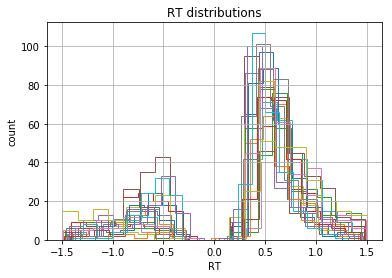

In [6]:
#Draw reaction time distributions
data = hddm.utils.flip_errors(data)
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in data.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
#plt.savefig('hddm_rt_distribution.pdf')

In [7]:
data.head(10)
data.describe()

,subj_idx,rt,response
count,6501.000000,6501.000000,6501.000000
mean,11.713736,0.357747,0.799723
std,7.098865,0.626868,0.400238
min,1.000000,-1.495898,0.000000
25%,6.000000,0.361156,1.000000
50%,10.000000,0.518764,1.000000
75%,18.000000,0.708536,1.000000
max,24.000000,1.499959,1.000000


# Model for drift-rate depending on conditions
### Gelman Rubin R Statistic for convergence check


In [8]:
models = list()
for i in range(5): #Estimate Model 5 times
    m = hddm.HDDM(data, p_outlier=0.05,depends_on={'v': 'conditions'})  #Drift-rate v dependent on 12 conditions
    m.find_starting_values() 
    m.sample(2000, burn=20,dbname='v_conditions.db',db='pickle')  #Draw 2.000 samples, burn first20
    models.append(m)
hddm.analyze.gelman_rubin(models) #Check for convergence within and between chains

C:\Users\juhoffmann\Anaconda3\envs\hddm_analysis\lib\site-packages\scipy\optimize\optimize.py:1934: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 2001 of 2000 complete in 217.4 sec

{'a': 1.0003988172982086,
 'a_std': 1.0008407816253775,
 'a_subj.1.0': 1.0009700202004355,
 'a_subj.10.0': 1.0035562812790457,
 'a_subj.11.0': 1.0020718293685276,
 'a_subj.14.0': 1.0003064020956127,
 'a_subj.15.0': 1.0061743053479986,
 'a_subj.16.0': 1.0006403255893617,
 'a_subj.17.0': 1.000297542625887,
 'a_subj.18.0': 1.0002833909116666,
 'a_subj.2.0': 1.00037692090017,
 'a_subj.20.0': 1.0001337011341536,
 'a_subj.21.0': 0.9999732393901435,
 'a_subj.22.0': 0.9999033640286124,
 'a_subj.24.0': 1.0001029091550429,
 'a_subj.3.0': 1.0010837262639354,
 'a_subj.4.0': 1.0009442490629785,
 'a_subj.5.0': 1.0010910271178266,
 'a_subj.6.0': 1.0002447667031575,
 'a_subj.7.0': 1.0002075623911217,
 'a_subj.8.0': 1.0001833478355824,
 'a_subj.9.0': 1.0015374836051874,
 't': 0.9999368405539528,
 't_std': 0.999992746694961,
 't_subj.1.0': 1.0007696720191837,
 't_subj.10.0': 1.0020483440665269,
 't_subj.11.0': 1.001510142526252,
 't_subj.14.0': 1.0000620915354845,
 't_subj.15.0': 1.0057666271923031,
 't

In [9]:
#m.save('v_conditions')

Plotting a
Plotting a_std
Plotting v(141ms_happy)
Plotting v(141ms_neutral)
Plotting v(141ms_sad)
Plotting v(16ms_happy)
Plotting v(16ms_neutral)
Plotting v(16ms_sad)
Plotting v(25ms_happy)
Plotting v(25ms_neutral)
Plotting v(25ms_sad)
Plotting v(8ms_happy)
Plotting v(8ms_neutral)
Plotting v(8ms_sad)
Plotting v_std
Plotting t
Plotting t_std


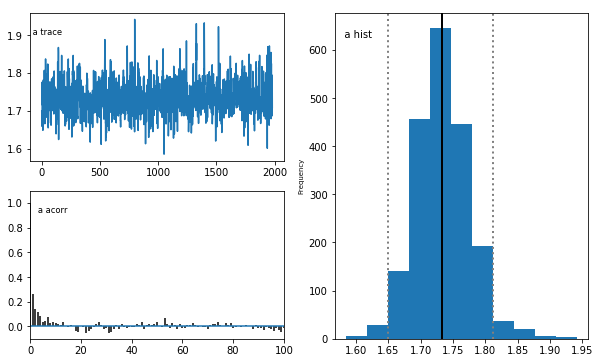

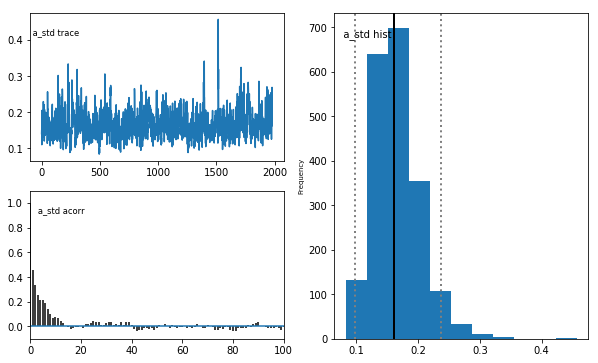

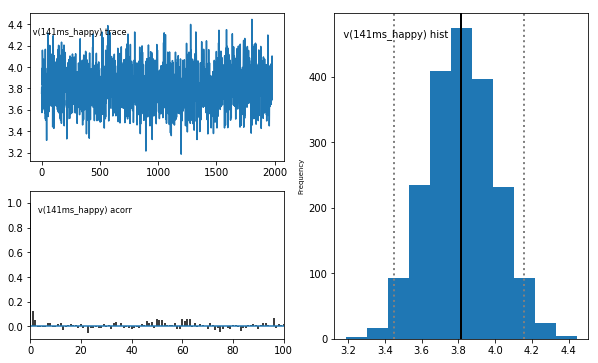

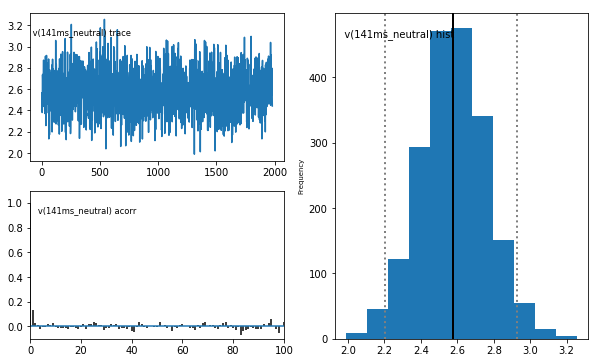

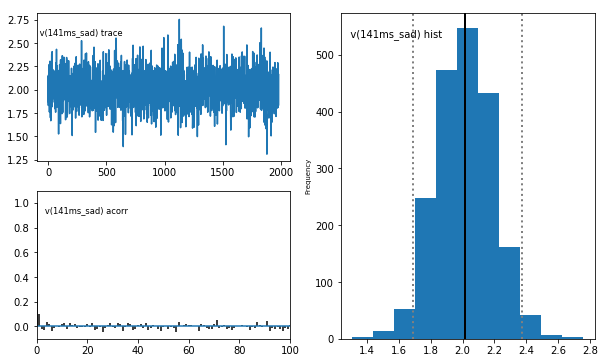

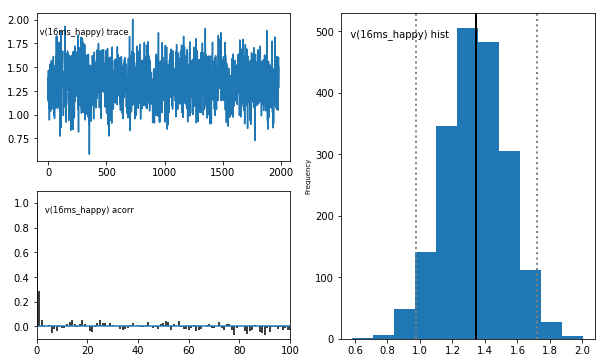

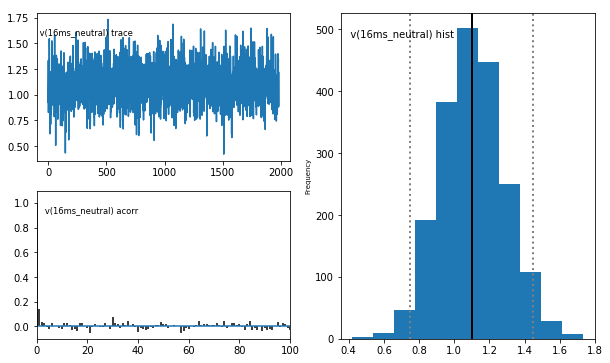

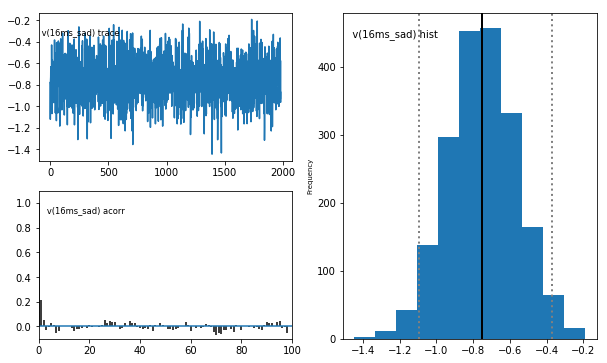

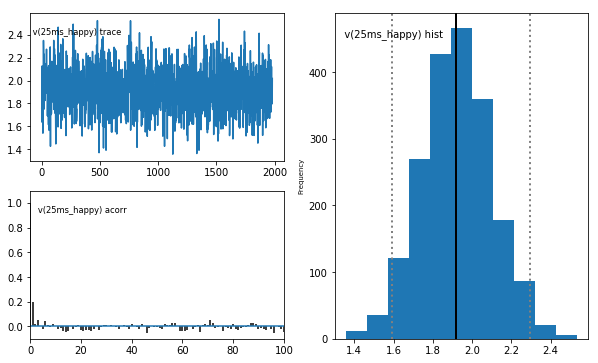

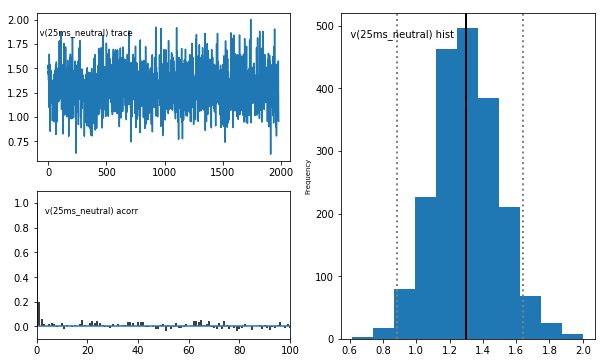

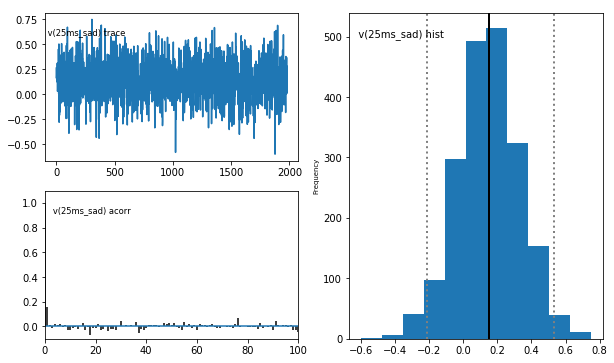

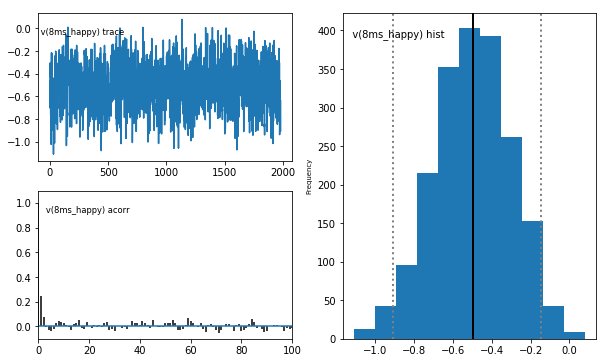

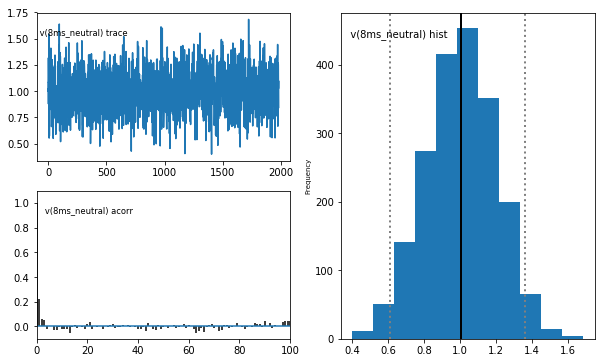

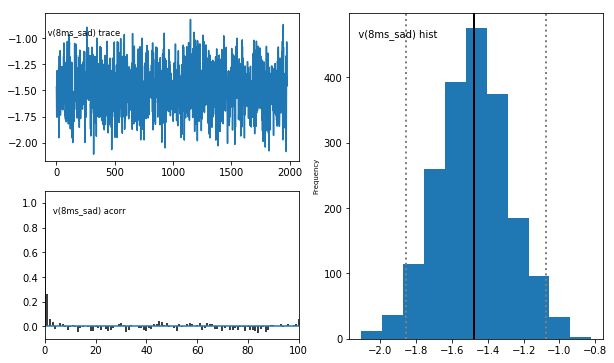

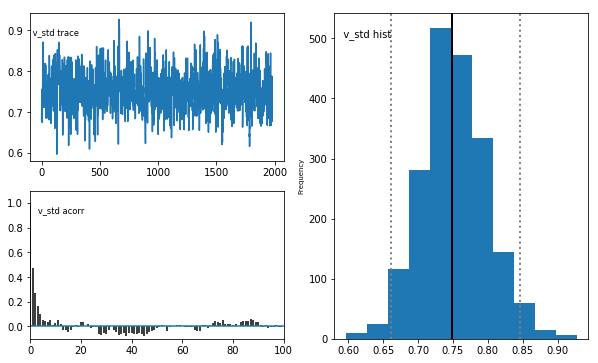

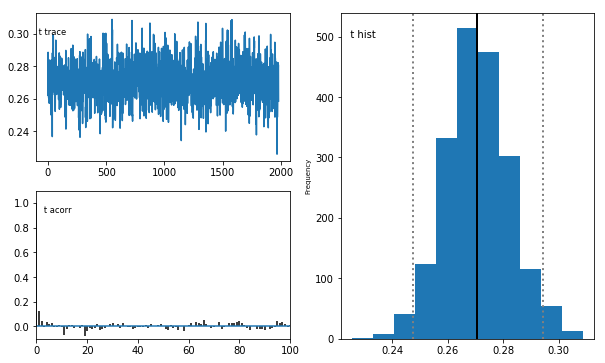

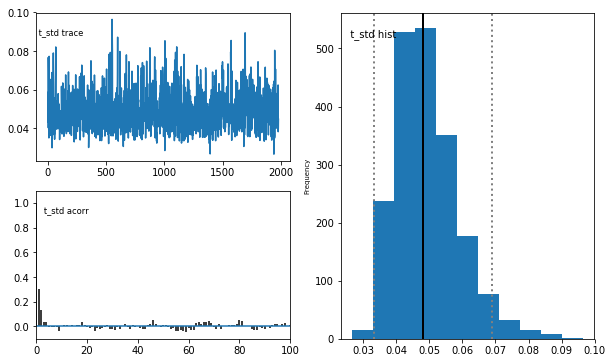

In [10]:
m.plot_posteriors()

In [11]:
m.print_stats()

                                mean       std      2.5q       25q       50q       75q     97.5q    mc err
a                           1.734555  0.042066  1.655832  1.707847  1.732512  1.759679  1.824271  0.001484
a_std                       0.165356  0.036979  0.106795  0.139637  0.161395  0.186578  0.250842  0.001681
a_subj.1.0                  1.743300  0.075824  1.606087  1.689197  1.740482  1.791766  1.899728  0.004070
a_subj.2.0                  1.730736  0.069830  1.598289  1.682326  1.732190  1.778909  1.862783  0.003294
a_subj.3.0                  1.902444  0.093532  1.744747  1.838641  1.893295  1.954903  2.124090  0.004889
a_subj.4.0                  1.676733  0.064640  1.558958  1.630882  1.675393  1.719479  1.808627  0.002485
a_subj.5.0                  1.762327  0.063945  1.640089  1.720196  1.761467  1.803532  1.895751  0.002522
a_subj.6.0                  1.491933  0.054745  1.387932  1.454413  1.490865  1.528730  1.604471  0.002265
a_subj.7.0                  1.759163 

# Plot Drift-Rates for all conditions

In [12]:
import matplotlib.pyplot

(0, 4)

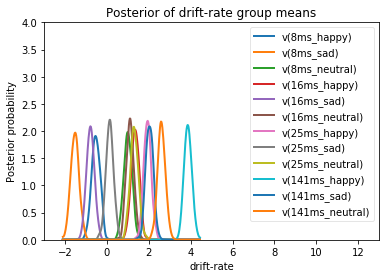

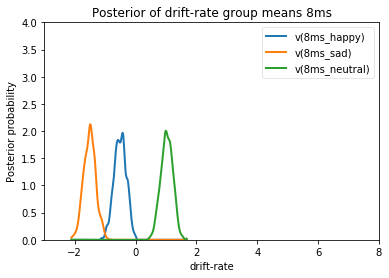

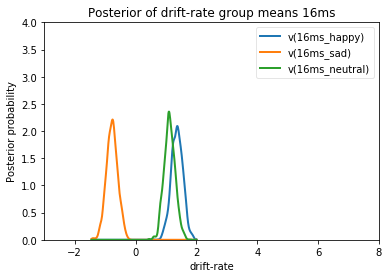

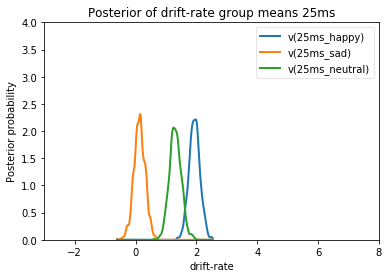

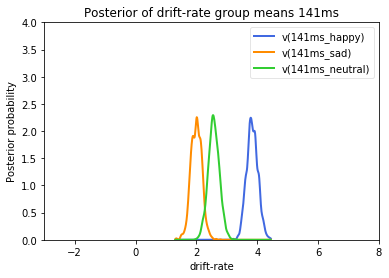

In [13]:
v_8ms_happy, v_8ms_sad, v_8ms_neutral,v_16ms_happy, v_16ms_sad, v_16ms_neutral, v_25ms_happy, v_25ms_sad, v_25ms_neutral, v_141ms_happy, v_141ms_sad, v_141ms_neutral  = m.nodes_db.node[['v(8ms_happy)', 'v(8ms_sad)', 'v(8ms_neutral)','v(16ms_happy)', 'v(16ms_sad)', 'v(16ms_neutral)', 'v(25ms_happy)', 'v(25ms_sad)', 'v(25ms_neutral)', 'v(141ms_happy)', 'v(141ms_sad)', 'v(141ms_neutral)']] 
hddm.analyze.plot_posterior_nodes([v_8ms_happy, v_8ms_sad, v_8ms_neutral,v_16ms_happy, v_16ms_sad, v_16ms_neutral, v_25ms_happy, v_25ms_sad, v_25ms_neutral, v_141ms_happy, v_141ms_sad, v_141ms_neutral])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means')
plt.xlim(-3,13)
plt.ylim(0,4)

v_8ms_happy, v_8ms_sad, v_8ms_neutral= m.nodes_db.node[['v(8ms_happy)', 'v(8ms_sad)', 'v(8ms_neutral)']] 
hddm.analyze.plot_posterior_nodes([v_8ms_happy, v_8ms_sad, v_8ms_neutral])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means 8ms')
plt.xlim(-3,8)
plt.ylim(0,4)

v_16ms_happy, v_16ms_sad, v_16ms_neutral= m.nodes_db.node[['v(16ms_happy)', 'v(16ms_sad)', 'v(16ms_neutral)']] 
hddm.analyze.plot_posterior_nodes([v_16ms_happy, v_16ms_sad, v_16ms_neutral])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means 16ms')
plt.xlim(-3,8)
plt.ylim(0,4)

v_25ms_happy, v_25ms_sad, v_25ms_neutral= m.nodes_db.node[['v(25ms_happy)', 'v(25ms_sad)', 'v(25ms_neutral)']] 
hddm.analyze.plot_posterior_nodes([v_25ms_happy, v_25ms_sad, v_25ms_neutral])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means 25ms')
plt.xlim(-3,8)
plt.ylim(0,4)

v_141ms_happy, v_141ms_sad, v_141ms_neutral= m.nodes_db.node[['v(141ms_happy)', 'v(141ms_sad)', 'v(141ms_neutral)']] 
plt.rcParams['axes.prop_cycle'] = ("cycler('color', ['royalblue','darkorange','limegreen']) +"
                                   "cycler('linestyle', ['-','-','-',])")
hddm.analyze.plot_posterior_nodes([v_141ms_happy, v_141ms_sad, v_141ms_neutral])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means 141ms')
plt.xlim(-3,8)
plt.ylim(0,4)


(0, 4)

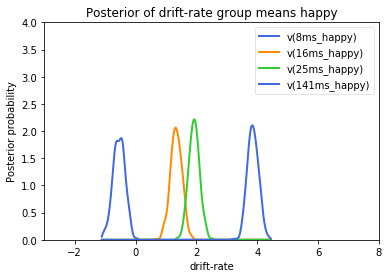

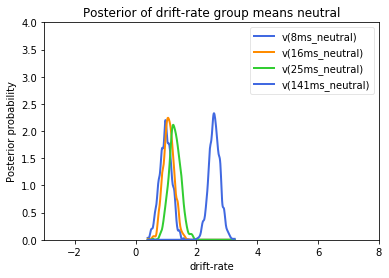

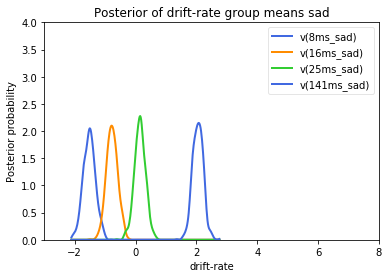

In [14]:
v_8ms_happy, v_16ms_happy, v_25ms_happy, v_141ms_happy= m.nodes_db.node[['v(8ms_happy)', 'v(16ms_happy)', 'v(25ms_happy)', 'v(141ms_happy)']] 
hddm.analyze.plot_posterior_nodes([v_8ms_happy, v_16ms_happy, v_25ms_happy, v_141ms_happy])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means happy')
plt.xlim(-3,8)
plt.ylim(0,4)


v_8ms_neutral, v_16ms_neutral, v_25ms_neutral, v_141ms_neutral= m.nodes_db.node[['v(8ms_neutral)', 'v(16ms_neutral)', 'v(25ms_neutral)', 'v(141ms_neutral)']] 
hddm.analyze.plot_posterior_nodes([v_8ms_neutral, v_16ms_neutral, v_25ms_neutral, v_141ms_neutral])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means neutral')
plt.xlim(-3,8)
plt.ylim(0,4)

v_8ms_sad, v_16ms_sad, v_25ms_sad, v_141ms_sad= m.nodes_db.node[['v(8ms_sad)', 'v(16ms_sad)', 'v(25ms_sad)', 'v(141ms_sad)']] 
hddm.analyze.plot_posterior_nodes([v_8ms_sad, v_16ms_sad, v_25ms_sad, v_141ms_sad])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means sad')
plt.xlim(-3,8)
plt.ylim(0,4)


# Get statistics

In [15]:
print "P(8ms_happy > 8ms_sad)=",(v_8ms_happy.trace() > v_8ms_sad.trace()).mean()
print "P(8ms_happy > 8ms_neutral)=",(v_8ms_happy.trace() > v_8ms_neutral.trace()).mean()

print "P(16ms_happy > 16ms_sad)=",(v_16ms_happy.trace() > v_16ms_sad.trace()).mean()
print "P(16ms_happy > 16ms_neutral)=",(v_16ms_happy.trace() > v_16ms_neutral.trace()).mean()

print "P(25ms_happy > 25ms_sad)=",(v_25ms_happy.trace() > v_25ms_sad.trace()).mean()
print "P(25ms_happy > 25ms_neutral)=",(v_25ms_happy.trace() > v_25ms_neutral.trace()).mean()

print "P(141ms_happy > 141ms_sad)=",(v_141ms_happy.trace() > v_141ms_sad.trace()).mean()
print "P(141ms_happy > 141ms_neutral)=",(v_141ms_happy.trace() > v_141ms_neutral.trace()).mean()


print "P(8ms_happy > 16ms_happy)=",(v_8ms_happy.trace() > v_16ms_happy.trace()).mean()
print "P(8ms_happy > 25ms_happy)=",(v_8ms_happy.trace() > v_25ms_happy.trace()).mean()
print "P(8ms_happy > 141ms_happy)=",(v_8ms_happy.trace() > v_141ms_happy.trace()).mean()
print "P(16ms_happy > 25ms_happy)=",(v_16ms_happy.trace() > v_25ms_happy.trace()).mean()
print "P(16ms_happy > 141ms_happy)=",(v_16ms_happy.trace() > v_141ms_happy.trace()).mean()
print "P(25ms_happy > 141ms_happy)=",(v_25ms_happy.trace() > v_141ms_happy.trace()).mean()


print "P(8ms_sad > 16ms_sad)=",(v_8ms_sad.trace() > v_16ms_sad.trace()).mean()
print "P(8ms_sad > 25ms_sad)=",(v_8ms_sad.trace() > v_25ms_sad.trace()).mean()
print "P(8ms_sad > 141ms_sad)=",(v_8ms_sad.trace() > v_141ms_sad.trace()).mean()
print "P(16ms_sad > 25ms_sad)=",(v_16ms_sad.trace() > v_25ms_sad.trace()).mean()
print "P(16ms_sad > 141ms_sad)=",(v_16ms_sad.trace() > v_141ms_sad.trace()).mean()
print "P(25ms_sad > 141ms_sad)=",(v_25ms_sad.trace() > v_141ms_sad.trace()).mean()


print "P(8ms_neutral > 16ms_neutral)=",(v_8ms_neutral.trace() > v_16ms_neutral.trace()).mean()
print "P(8ms_neutral > 25ms_neutral)=",(v_8ms_neutral.trace() > v_25ms_neutral.trace()).mean()
print "P(8ms_neutral > 141ms_neutral)=",(v_8ms_neutral.trace() > v_141ms_neutral.trace()).mean()
print "P(16ms_neutral > 25ms_neutral)=",(v_16ms_neutral.trace() > v_25ms_neutral.trace()).mean()
print "P(16ms_neutral > 141ms_neutral)=",(v_16ms_neutral.trace() > v_141ms_neutral.trace()).mean()
print "P(25ms_neutral > 141ms_neutral)=",(v_25ms_neutral.trace() > v_141ms_neutral.trace()).mean()

P(8ms_happy > 8ms_sad)= 0.9994949494949495
P(8ms_happy > 8ms_neutral)= 0.0
P(16ms_happy > 16ms_sad)= 1.0
P(16ms_happy > 16ms_neutral)= 0.8287878787878787
P(25ms_happy > 25ms_sad)= 1.0
P(25ms_happy > 25ms_neutral)= 0.9904040404040404
P(141ms_happy > 141ms_sad)= 1.0
P(141ms_happy > 141ms_neutral)= 1.0
P(8ms_happy > 16ms_happy)= 0.0
P(8ms_happy > 25ms_happy)= 0.0
P(8ms_happy > 141ms_happy)= 0.0
P(16ms_happy > 25ms_happy)= 0.014646464646464647
P(16ms_happy > 141ms_happy)= 0.0
P(25ms_happy > 141ms_happy)= 0.0
P(8ms_sad > 16ms_sad)= 0.005555555555555556
P(8ms_sad > 25ms_sad)= 0.0
P(8ms_sad > 141ms_sad)= 0.0
P(16ms_sad > 25ms_sad)= 0.000505050505050505
P(16ms_sad > 141ms_sad)= 0.0
P(25ms_sad > 141ms_sad)= 0.0
P(8ms_neutral > 16ms_neutral)= 0.34595959595959597
P(8ms_neutral > 25ms_neutral)= 0.13737373737373737
P(8ms_neutral > 141ms_neutral)= 0.0
P(16ms_neutral > 25ms_neutral)= 0.22171717171717173
P(16ms_neutral > 141ms_neutral)= 0.0
P(25ms_neutral > 141ms_neutral)= 0.0


# Estimate Main Effects

# Model for drift-rate depending on main effects
### Gelman Rubin R Statistic for convergence check

In [23]:
#Gelman Rubin R statistic 
models = list()
for i in range(5):
    model_stim = hddm.HDDM(data, p_outlier=0.05,depends_on={'v': 'stim'})    #, depends_on={'v': 'stim'})
    model_stim.find_starting_values()
    model_stim.sample(2000, burn=20, dbname='v_stim.db',db='pickle')  
    models.append(model_stim)
hddm.analyze.gelman_rubin(models) #Check for convergence within and between chains



 [-----------------100%-----------------] 2001 of 2000 complete in 146.5 sec

{'a': 1.0005336055370202,
 'a_std': 1.000069049310382,
 'a_subj.1.0': 0.9998262130344926,
 'a_subj.10.0': 1.0010559091878615,
 'a_subj.11.0': 1.0006617923419736,
 'a_subj.14.0': 0.999955214323164,
 'a_subj.15.0': 1.0007198647921614,
 'a_subj.16.0': 0.9999723307730559,
 'a_subj.17.0': 0.9998001169842768,
 'a_subj.18.0': 1.0000047732856787,
 'a_subj.2.0': 1.0000133381448588,
 'a_subj.20.0': 1.0000880541566846,
 'a_subj.21.0': 0.9999242385887787,
 'a_subj.22.0': 0.9998676793102862,
 'a_subj.24.0': 1.000310320142134,
 'a_subj.3.0': 1.000209396944302,
 'a_subj.4.0': 1.0006890477846107,
 'a_subj.5.0': 0.9998546938602182,
 'a_subj.6.0': 1.0001328324732626,
 'a_subj.7.0': 1.0002338326662983,
 'a_subj.8.0': 1.0009951829979686,
 'a_subj.9.0': 1.0005874866668918,
 't': 0.9998394038205795,
 't_std': 0.9998634218627978,
 't_subj.1.0': 0.9997936424088717,
 't_subj.10.0': 1.0007514685952232,
 't_subj.11.0': 1.000597447622607,
 't_subj.14.0': 1.0000879565756087,
 't_subj.15.0': 1.0009850070281747,
 't

In [24]:
#model_stim.save('v_stim')

In [25]:
#Gelman Rubin R statistic 
models = list()
for i in range(5):
    model_level = hddm.HDDM(data, p_outlier=0.05,depends_on={'v': 'level'})    #, depends_on={'v': 'stim'})
    model_level.find_starting_values()
    model_level.sample(2000, burn=20, dbname='v_level.db',db='pickle') 
    models.append(model_level)
hddm.analyze.gelman_rubin(models) #Check for convergence within and between chains


 [-----------------100%-----------------] 2000 of 2000 complete in 156.1 sec

{'a': 0.999878821100665,
 'a_std': 1.0014910470239018,
 'a_subj.1.0': 1.0003636800120193,
 'a_subj.10.0': 0.9999299326833792,
 'a_subj.11.0': 1.0002777894290924,
 'a_subj.14.0': 1.0023560341225781,
 'a_subj.15.0': 1.0020649040680827,
 'a_subj.16.0': 1.0010975177126011,
 'a_subj.17.0': 1.000209509579595,
 'a_subj.18.0': 1.0004167587633959,
 'a_subj.2.0': 1.001339321112097,
 'a_subj.20.0': 1.000229032292738,
 'a_subj.21.0': 1.0006474357327833,
 'a_subj.22.0': 1.000289286176084,
 'a_subj.24.0': 0.9998948947904466,
 'a_subj.3.0': 1.0012771433986551,
 'a_subj.4.0': 1.0004481385271902,
 'a_subj.5.0': 0.9999593086339671,
 'a_subj.6.0': 1.0009949752295562,
 'a_subj.7.0': 0.9998928316259748,
 'a_subj.8.0': 1.0004134685293162,
 'a_subj.9.0': 1.0005387804967618,
 't': 1.0000154663795064,
 't_std': 0.9999416308199307,
 't_subj.1.0': 0.9998078345173103,
 't_subj.10.0': 0.9997760137100585,
 't_subj.11.0': 1.0004372016843674,
 't_subj.14.0': 1.0009757025503403,
 't_subj.15.0': 1.00220316384987,
 't_s

In [26]:
#model_level.save('v_level')

Plotting a
Plotting a_std
Plotting v(happy)
Plotting v(neutral)
Plotting v(sad)
Plotting v_std
Plotting t
Plotting t_std


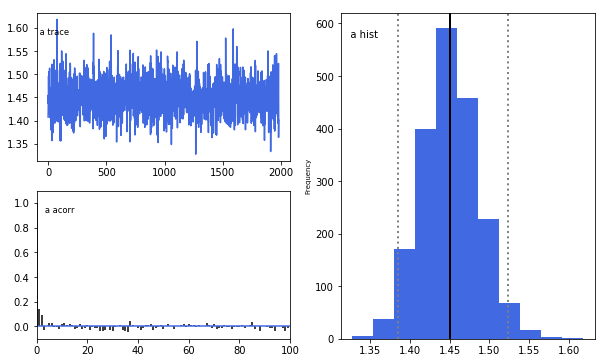

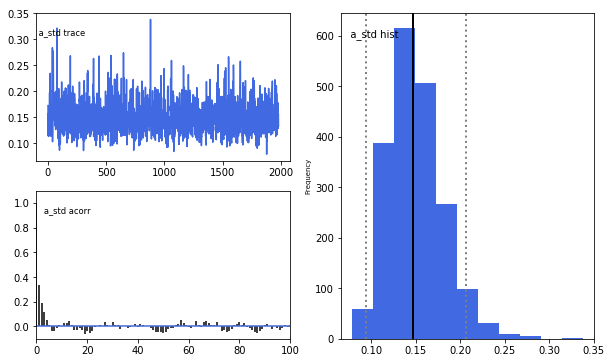

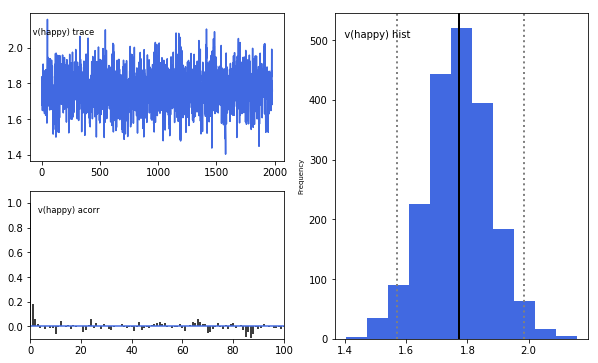

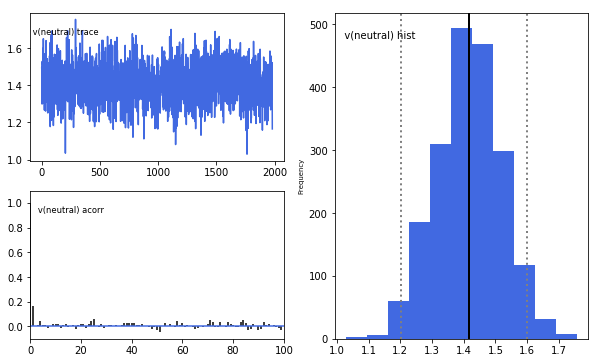

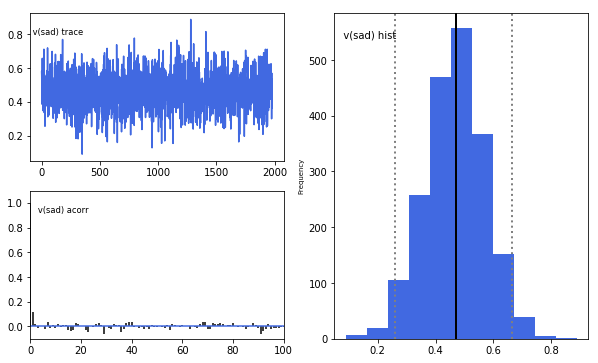

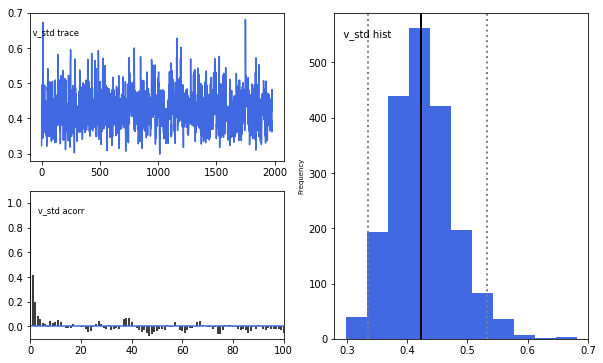

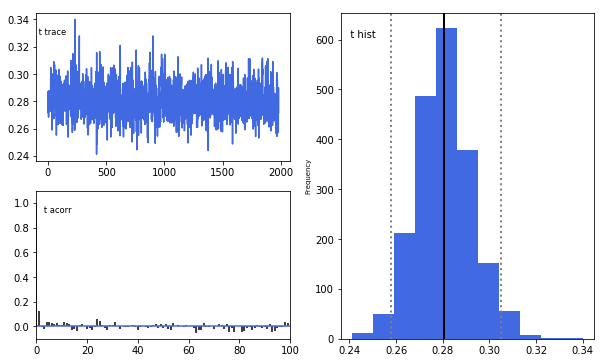

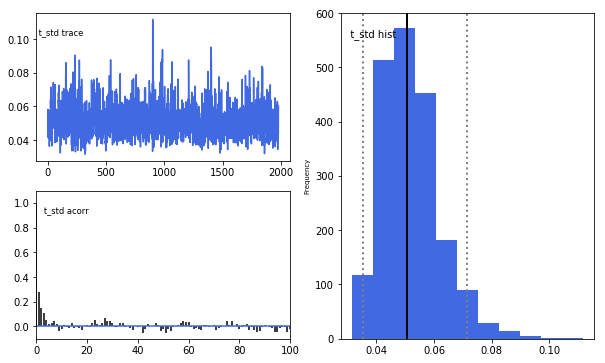

In [27]:
model_stim.plot_posteriors()

In [28]:
model_stim.print_stats()

                          mean       std      2.5q       25q       50q       75q     97.5q    mc err
a                     1.451042  0.036083  1.383464  1.427296  1.450527  1.474303  1.522294  0.001039
a_std                 0.150517  0.030785  0.101029  0.128198  0.146788  0.168435  0.219301  0.001044
a_subj.1.0            1.327383  0.038571  1.255421  1.300863  1.325779  1.352112  1.406768  0.001238
a_subj.2.0            1.451859  0.045814  1.363555  1.420470  1.450441  1.483535  1.543784  0.001769
a_subj.3.0            1.535218  0.049323  1.442553  1.501040  1.533537  1.567195  1.632720  0.001690
a_subj.4.0            1.548755  0.055500  1.445058  1.512092  1.545937  1.584819  1.664556  0.001876
a_subj.5.0            1.413233  0.039182  1.340366  1.385639  1.412109  1.439198  1.494244  0.001185
a_subj.6.0            1.234068  0.037629  1.163781  1.209812  1.232104  1.258892  1.311104  0.001338
a_subj.7.0            1.591813  0.060009  1.482012  1.551360  1.588859  1.629767  1.718145 

Plotting a
Plotting a_std
Plotting v(141ms)
Plotting v(16ms)
Plotting v(25ms)
Plotting v(8ms)
Plotting v_std
Plotting t
Plotting t_std


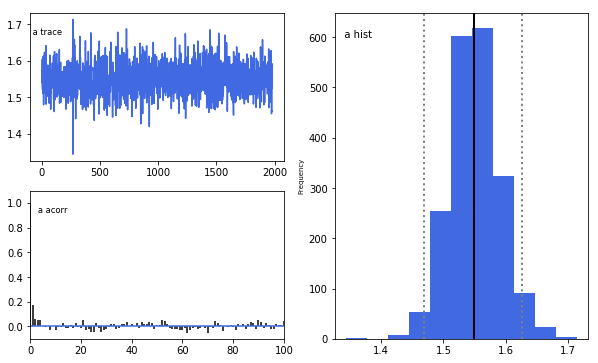

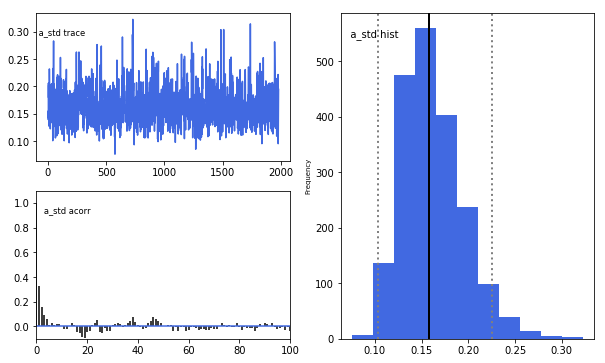

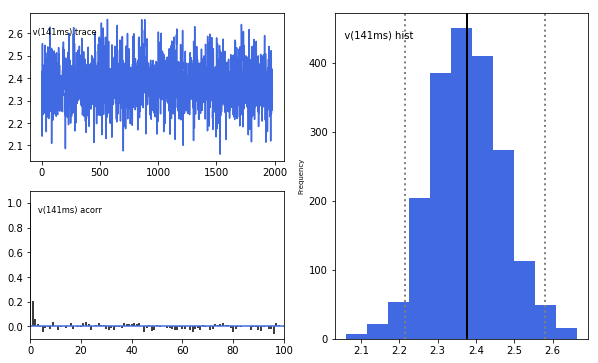

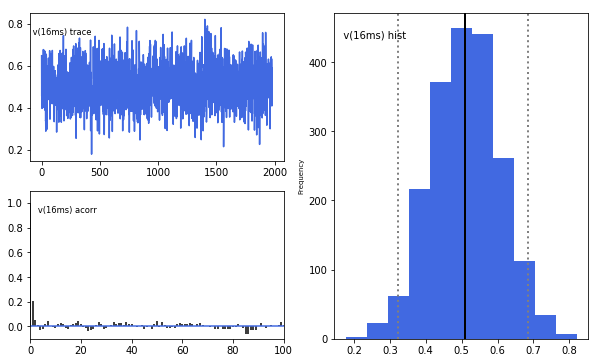

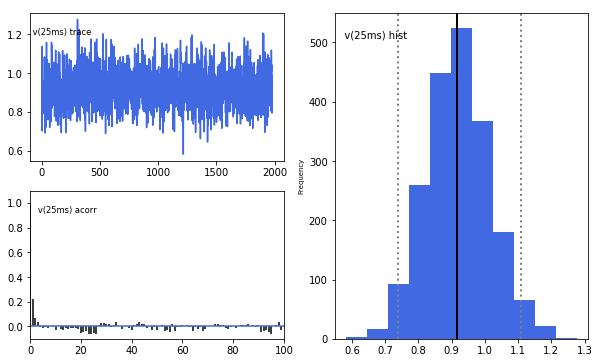

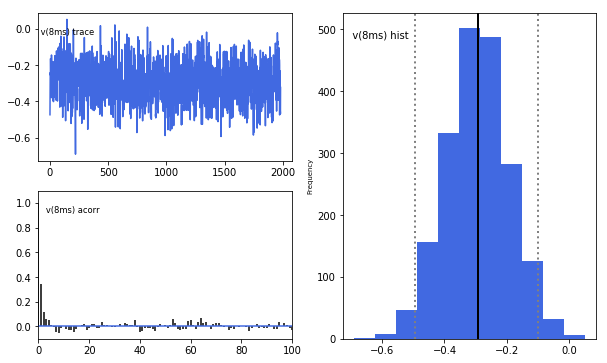

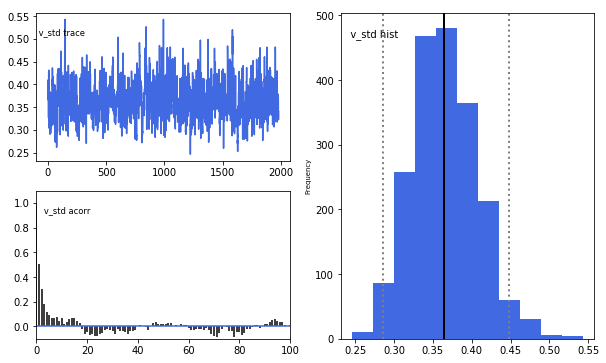

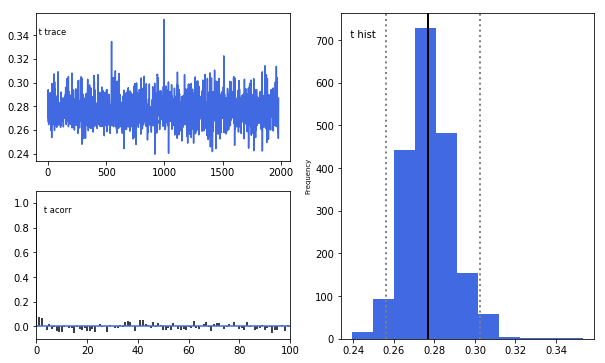

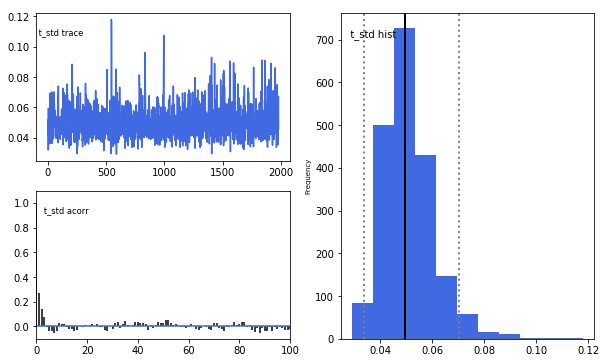

In [29]:
model_level.plot_posteriors()

In [30]:
model_level.print_stats()

                        mean       std      2.5q       25q       50q       75q     97.5q    mc err
a                   1.550354  0.040146  1.472326  1.523926  1.548811  1.574837  1.635333  0.001121
a_std               0.162346  0.033003  0.110892  0.138035  0.158290  0.180863  0.238751  0.001113
a_subj.1.0          1.418412  0.045287  1.331032  1.389404  1.417132  1.446901  1.511027  0.001719
a_subj.2.0          1.589435  0.055730  1.482166  1.552149  1.587257  1.627665  1.700742  0.002079
a_subj.3.0          1.603412  0.054892  1.499254  1.565847  1.602324  1.638783  1.719152  0.001973
a_subj.4.0          1.575531  0.056948  1.472350  1.535149  1.571632  1.614265  1.690132  0.002192
a_subj.5.0          1.582701  0.049020  1.486969  1.549540  1.581495  1.615268  1.680161  0.001756
a_subj.6.0          1.306810  0.042604  1.229511  1.276964  1.306062  1.333748  1.396019  0.001645
a_subj.7.0          1.647760  0.062806  1.530287  1.605077  1.644615  1.684783  1.784003  0.002296
a_subj.8.0

# Plot drift-rate for main effects

In [31]:
import matplotlib.pyplot

(0, 6)

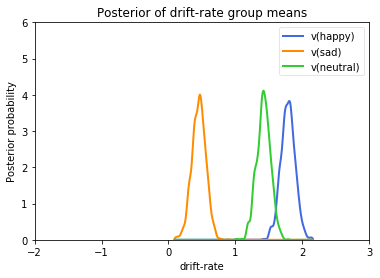

In [32]:
v_happy, v_sad, v_neutral = model_stim.nodes_db.node[['v(happy)', 'v(sad)', 'v(neutral)']] 
plt.rcParams['axes.prop_cycle'] = ("cycler('color', ['royalblue','darkorange','limegreen']) +"
                                   "cycler('linestyle', ['-','-','-',])")
hddm.analyze.plot_posterior_nodes([v_happy, v_sad, v_neutral])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means')
plt.xlim(-2,3)
plt.ylim(0,6)

(0, 6)

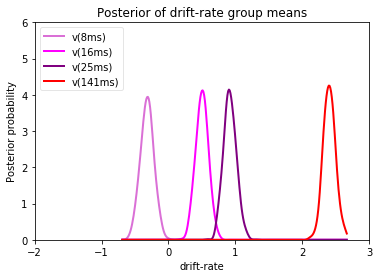

In [33]:
v_8ms, v_16ms, v_25ms, v_141ms = model_level.nodes_db.node[['v(8ms)', 'v(16ms)', 'v(25ms)', 'v(141ms)']] 
plt.rcParams['axes.prop_cycle'] = ("cycler('color', ['orchid','magenta','purple','red']) +"
                                   "cycler('linestyle', ['-','-','-','-',])")
hddm.analyze.plot_posterior_nodes([v_8ms, v_16ms, v_25ms, v_141ms])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means')
plt.xlim(-2,3)
plt.ylim(0,6)

# Get Statistics

In [34]:
print "P(happy > sad)=",(v_happy.trace() > v_sad.trace()).mean()
print "P(sad > happy)=",(v_sad.trace() > v_happy.trace()).mean()
print "P(happy > neutral)=",(v_happy.trace() > v_neutral.trace()).mean()
print "P(sad > neutral)=",(v_sad.trace() > v_neutral.trace()).mean()

P(happy > sad)= 1.0
P(sad > happy)= 0.0
P(happy > neutral)= 0.9934343434343434
P(sad > neutral)= 0.0


In [35]:
print "P(8ms > 16ms) =",(v_8ms.trace() > v_16ms.trace()).mean()
print "P(8ms > 25ms) =",(v_8ms.trace() > v_25ms.trace()).mean()
print "P(16ms > 25ms) =",(v_16ms.trace() > v_25ms.trace()).mean()
print "P(25ms > 141ms) =",(v_25ms.trace() > v_141ms.trace()).mean()
print "P(16ms > 141ms) =",(v_16ms.trace() > v_141ms.trace()).mean()
print "P(8ms > 141ms) =",(v_8ms.trace() > v_141ms.trace()).mean()

P(8ms > 16ms) = 0.0
P(8ms > 25ms) = 0.0
P(16ms > 25ms) = 0.00202020202020202
P(25ms > 141ms) = 0.0
P(16ms > 141ms) = 0.0
P(8ms > 141ms) = 0.0


# Model for bias depending on main effects
### Gelman Rubin R Statistic for convergence check

In [36]:
models = list()
for i in range(5):
    model_level_bias = hddm.HDDM(data, bias = True, p_outlier=0.05, depends_on={'z': 'level'})    
    model_level_bias.find_starting_values()
    model_level_bias.sample(2000, burn=20, dbname='z_level.db',db='pickle')  
    models.append(model_level_bias)
hddm.analyze.gelman_rubin(models) #Check for convergence within and between chains


 [-----------------100%-----------------] 2000 of 2000 complete in 205.7 sec

{'a': 1.0004477641374434,
 'a_std': 1.0003850338555706,
 'a_subj.1.0': 1.0008742798022836,
 'a_subj.10.0': 1.0002020343151974,
 'a_subj.11.0': 1.000286406885653,
 'a_subj.14.0': 1.0009235711621418,
 'a_subj.15.0': 0.9999981151983077,
 'a_subj.16.0': 1.0018826977548356,
 'a_subj.17.0': 1.0006043956484738,
 'a_subj.18.0': 1.0010971323581144,
 'a_subj.2.0': 1.0000577448549892,
 'a_subj.20.0': 1.001107424088294,
 'a_subj.21.0': 1.0842239405798957,
 'a_subj.22.0': 1.000168394749569,
 'a_subj.24.0': 0.9999495543626853,
 'a_subj.3.0': 1.000521497541312,
 'a_subj.4.0': 1.000788549422213,
 'a_subj.5.0': 1.0001280062142053,
 'a_subj.6.0': 1.0000692452912319,
 'a_subj.7.0': 0.9998104476385032,
 'a_subj.8.0': 1.0000012089649548,
 'a_subj.9.0': 1.0004596446071081,
 't': 1.0014330394450353,
 't_std': 1.0001889985718533,
 't_subj.1.0': 1.0005679404716314,
 't_subj.10.0': 0.99983191782844,
 't_subj.11.0': 1.0016801505209372,
 't_subj.14.0': 1.0009446363630412,
 't_subj.15.0': 1.0003051440421404,
 't_s

In [37]:
#model_level_bias.save('z_level')

In [38]:
models = list()
for i in range(5):
    model_stim_bias = hddm.HDDM(data, bias=True, p_outlier=0.05, depends_on={'z': 'stim'})   
    model_stim_bias.find_starting_values()
    model_stim_bias.sample(2000, burn=20, dbname='z_stim.db',db='pickle')  #Draw 10.000 samples, burn first 500, every 5ths sample will be saved
    models.append(model_stim_bias)
hddm.analyze.gelman_rubin(models) #Check for convergence within and between chains


 [-----------------100%-----------------] 2000 of 2000 complete in 197.9 sec

{'a': 1.0006587936193654,
 'a_std': 0.9998257664061543,
 'a_subj.1.0': 1.000473978448765,
 'a_subj.10.0': 1.000065799035655,
 'a_subj.11.0': 0.9999642523425804,
 'a_subj.14.0': 0.9999871752910863,
 'a_subj.15.0': 1.0005349026923294,
 'a_subj.16.0': 1.0011412547961307,
 'a_subj.17.0': 1.0004635950158705,
 'a_subj.18.0': 1.000382060640122,
 'a_subj.2.0': 1.0022855164720952,
 'a_subj.20.0': 1.0008044419383684,
 'a_subj.21.0': 1.0015559462734238,
 'a_subj.22.0': 1.0012054283908374,
 'a_subj.24.0': 1.000118894269766,
 'a_subj.3.0': 1.0011841405966022,
 'a_subj.4.0': 1.0001447234146845,
 'a_subj.5.0': 1.0005207040309765,
 'a_subj.6.0': 1.0004820591249752,
 'a_subj.7.0': 1.0007637241994183,
 'a_subj.8.0': 1.000274032651223,
 'a_subj.9.0': 1.0003761147972858,
 't': 1.0006798199877307,
 't_std': 1.0001710379193143,
 't_subj.1.0': 1.000547116227339,
 't_subj.10.0': 1.0006345568770858,
 't_subj.11.0': 1.0002881831051311,
 't_subj.14.0': 1.0009840138429609,
 't_subj.15.0': 1.0014724329137643,
 't_

In [39]:
#model_stim_bias.save('z_stim')

Plotting a
Plotting a_std
Plotting v
Plotting v_std
Plotting t
Plotting t_std
Plotting z(happy)
Plotting z(neutral)
Plotting z(sad)
Plotting z_std


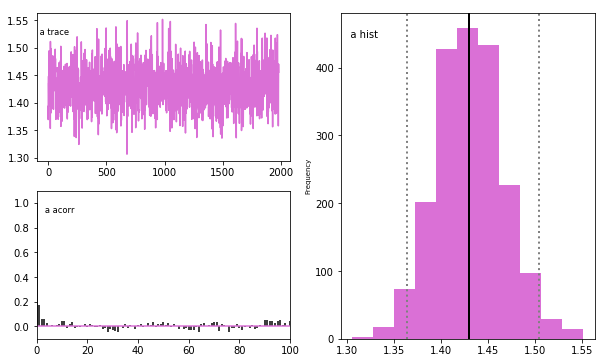

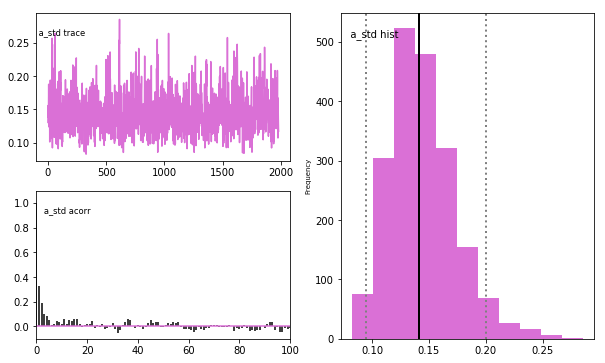

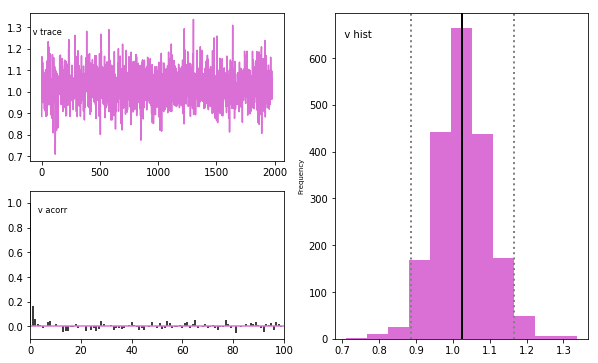

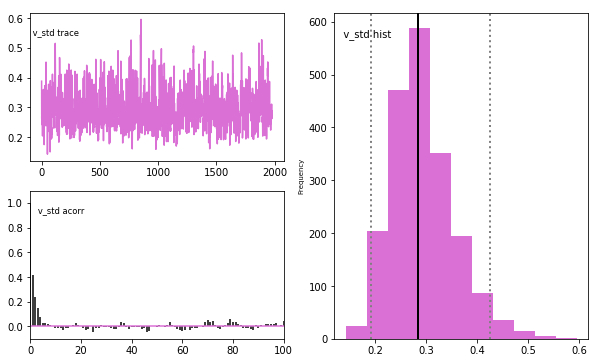

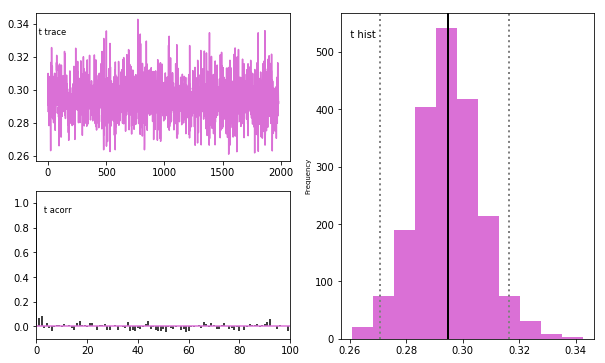

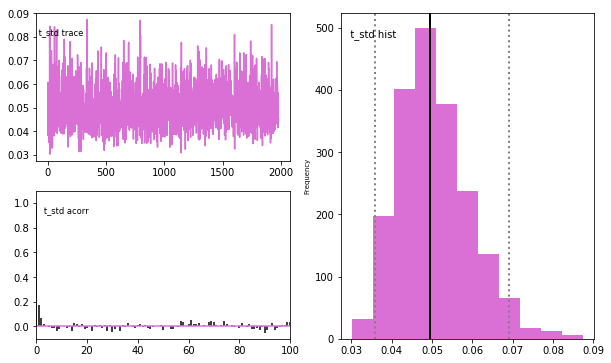

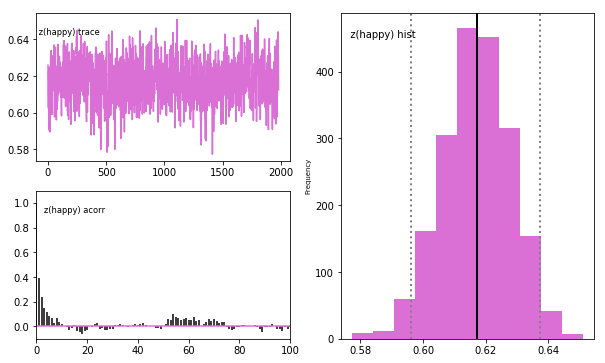

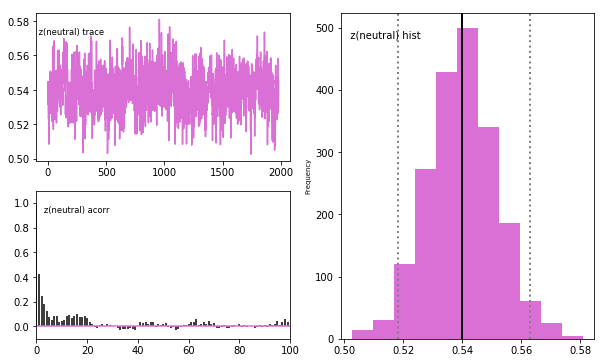

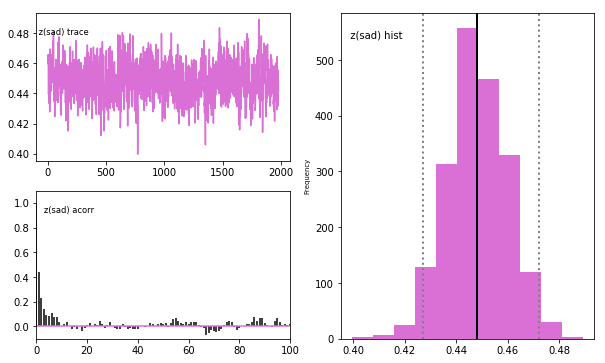

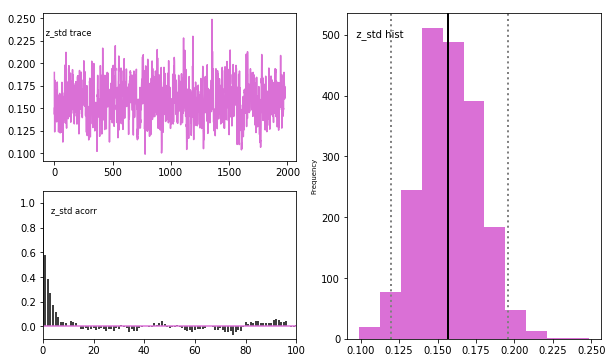

In [40]:
model_stim_bias.plot_posteriors()

In [41]:
model_stim_bias.print_stats()

                          mean       std      2.5q       25q       50q       75q     97.5q    mc err
a                     1.431127  0.035649  1.363984  1.406997  1.430265  1.454038  1.504365  0.001033
a_std                 0.144692  0.029036  0.099011  0.124310  0.141085  0.160653  0.212964  0.001097
a_subj.1.0            1.287311  0.036519  1.217605  1.263079  1.285869  1.311830  1.361752  0.001186
a_subj.2.0            1.443096  0.048066  1.350559  1.409625  1.442441  1.475675  1.536775  0.002555
a_subj.3.0            1.499067  0.045388  1.414954  1.468537  1.497283  1.528877  1.587988  0.001518
a_subj.4.0            1.514543  0.048040  1.427048  1.479614  1.512916  1.546198  1.608575  0.001457
a_subj.5.0            1.419070  0.039370  1.342782  1.392532  1.419244  1.445864  1.495757  0.001177
a_subj.6.0            1.220915  0.037896  1.146510  1.194829  1.219636  1.247570  1.293304  0.001255
a_subj.7.0            1.580627  0.056774  1.476786  1.541042  1.578363  1.618742  1.703479 

Plotting a
Plotting a_std
Plotting v
Plotting v_std
Plotting t
Plotting t_std
Plotting z(141ms)
Plotting z(16ms)
Plotting z(25ms)
Plotting z(8ms)
Plotting z_std


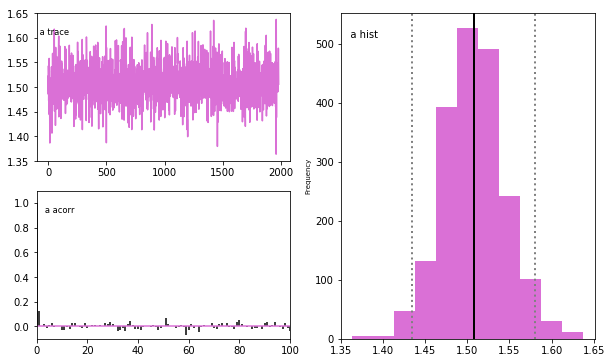

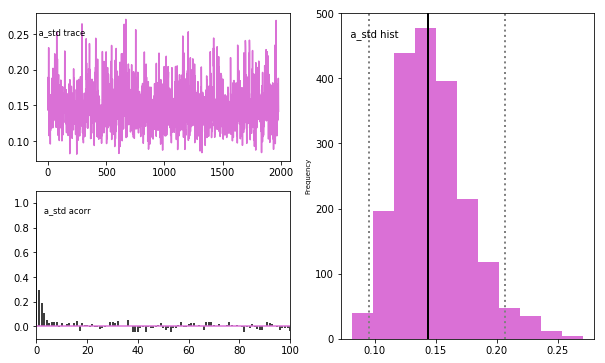

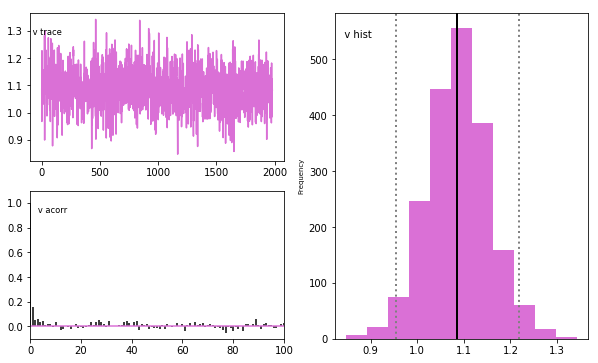

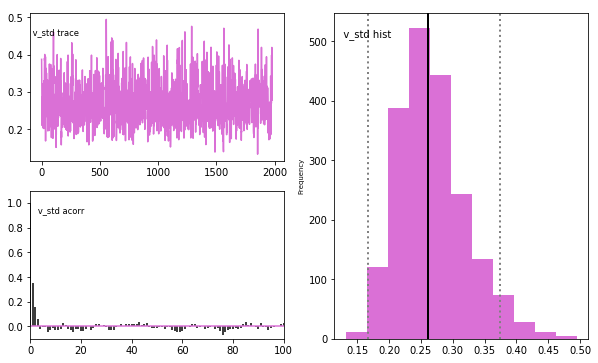

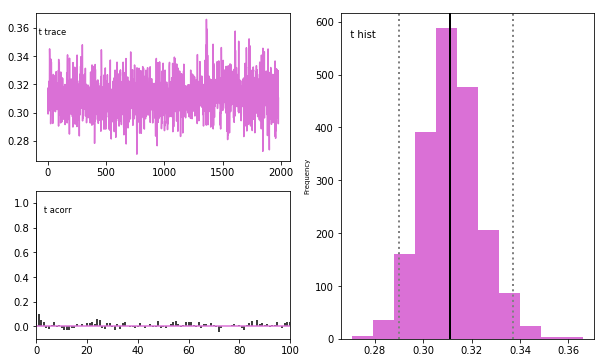

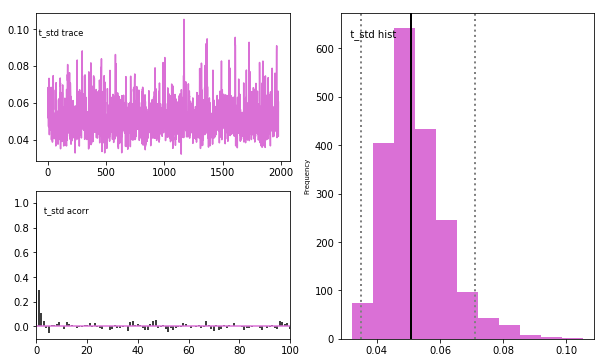

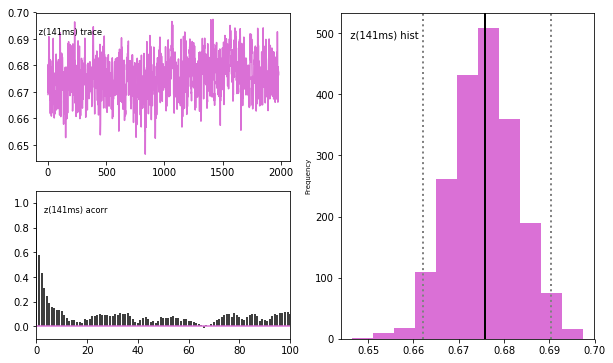

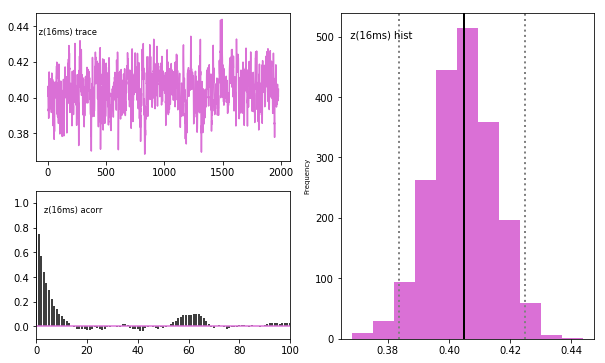

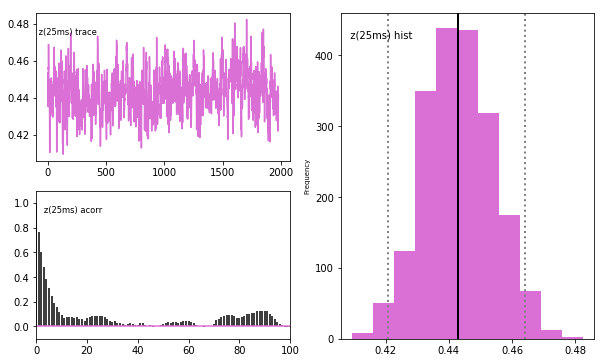

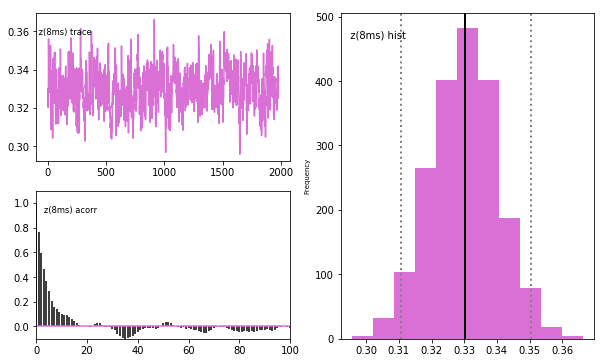

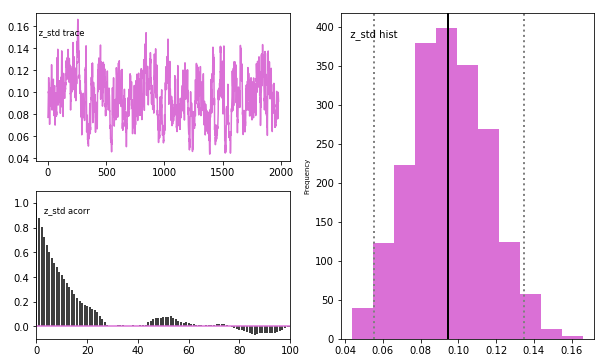

In [42]:
model_level_bias.plot_posteriors()

In [43]:
model_level_bias.print_stats()

                        mean       std      2.5q       25q       50q       75q     97.5q    mc err
a                   1.508536  0.036540  1.436359  1.483983  1.508326  1.530752  1.584051  0.000916
a_std               0.148041  0.029269  0.101454  0.127912  0.144000  0.164900  0.221521  0.001045
a_subj.1.0          1.409020  0.042389  1.325424  1.379554  1.408219  1.437246  1.493502  0.001328
a_subj.2.0          1.510296  0.050902  1.411784  1.474298  1.509034  1.543778  1.618874  0.001569
a_subj.3.0          1.573632  0.051556  1.474655  1.538121  1.573813  1.607896  1.676797  0.001434
a_subj.4.0          1.554365  0.049332  1.457010  1.521410  1.552357  1.585652  1.657918  0.001416
a_subj.5.0          1.525201  0.047490  1.440141  1.492177  1.522620  1.556725  1.622908  0.001895
a_subj.6.0          1.275161  0.038047  1.203420  1.249604  1.274630  1.300384  1.352331  0.001204
a_subj.7.0          1.626235  0.057189  1.514382  1.587510  1.625995  1.663970  1.743621  0.001482
a_subj.8.0

# Plot bias for main effects

(0, 50)

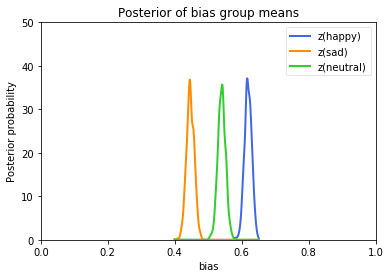

In [44]:
z_happy, z_sad, z_neutral = model_stim_bias.nodes_db.node[['z(happy)', 'z(sad)', 'z(neutral)']] 
plt.rcParams['axes.prop_cycle'] = ("cycler('color', ['royalblue','darkorange','limegreen']) +"
                                   "cycler('linestyle', ['-','-','-',])")
hddm.analyze.plot_posterior_nodes([z_happy, z_sad, z_neutral])
plt.xlabel('bias')
plt.ylabel('Posterior probability')
plt.title('Posterior of bias group means')
plt.xlim(0,1)
plt.ylim(0,50)

(0, 60)

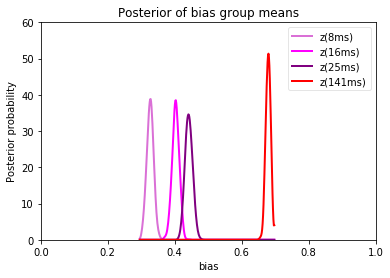

In [45]:
z_8ms, z_16ms, z_25ms, z_141ms = model_level_bias.nodes_db.node[['z(8ms)', 'z(16ms)', 'z(25ms)', 'z(141ms)']] 
plt.rcParams['axes.prop_cycle'] = ("cycler('color', ['orchid','magenta','purple','red']) +"
                                   "cycler('linestyle', ['-','-','-','-',])")

hddm.analyze.plot_posterior_nodes([z_8ms, z_16ms, z_25ms, z_141ms])
plt.xlabel('bias')
plt.ylabel('Posterior probability')
plt.title('Posterior of bias group means')
plt.xlim(0,1)
plt.ylim(0,60)

# Get Statistics

In [46]:
print "P(happy > sad)=",(z_happy.trace() > z_sad.trace()).mean()
print "P(sad > happy)=",(z_sad.trace() > z_happy.trace()).mean()
print "P(happy > neutral)=",(z_happy.trace() > z_neutral.trace()).mean()
print "P(sad > neutral)=",(z_sad.trace() > z_neutral.trace()).mean()

P(happy > sad)= 1.0
P(sad > happy)= 0.0
P(happy > neutral)= 1.0
P(sad > neutral)= 0.0


In [47]:
print "P(8ms > 16ms)=",(z_8ms.trace() > z_16ms.trace()).mean()
print "P(8ms > 25ms)=",(z_8ms.trace() > z_25ms.trace()).mean()
print "P(8ms > 141ms)=",(z_8ms.trace() > z_141ms.trace()).mean()
print "P(16ms > 25ms)=",(z_16ms.trace() > z_25ms.trace()).mean()
print "P(16ms > 141ms)=",(z_16ms.trace() > z_141ms.trace()).mean()
print "P(25ms > 141ms)=",(z_25ms.trace() > z_141ms.trace()).mean()

P(8ms > 16ms)= 0.0
P(8ms > 25ms)= 0.0
P(8ms > 141ms)= 0.0
P(16ms > 25ms)= 0.00404040404040404
P(16ms > 141ms)= 0.0
P(25ms > 141ms)= 0.0


# Load Model

In [48]:
# Load the model
#v_conditions = hddm.load('v_conditions')
#v_level = hddm.load('v_level')

In [49]:
#hddm.analyze.gelman_rubin(v_conditions)